# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date - then append corresponding lists 
        
        city = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
  

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vrangel'
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | chiras
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | mbandaka
Processing Record 12 of Set 1 | al muwayh
Processing Record 13 of Set 1 | sisimiut
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | tobol'sk
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | esmeraldas
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | kamina
Processing Record 21 of Set 1 | illizi
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set 1 | bilibino
P

Processing Record 39 of Set 4 | malinyi
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | concepcion
Processing Record 42 of Set 4 | minas de marcona
Processing Record 43 of Set 4 | nizwa
Processing Record 44 of Set 4 | kangding
Processing Record 45 of Set 4 | kushiro
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | ashland
Processing Record 48 of Set 4 | wuwei
Processing Record 49 of Set 4 | dolinsk
Processing Record 0 of Set 5 | mersing
Processing Record 1 of Set 5 | ondjiva
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | north bend
Processing Record 4 of Set 5 | fada
Processing Record 5 of Set 5 | port shepstone
Processing Record 6 of Set 5 | vernon
Processing Record 7 of Set 5 | makoua
Processing Record 8 of Set 5 | laguna
Processing Record 9 of Set 5 | mayya
Processing Record 10 of Set 5 | paranaiba
Processing Record 11 of Set 5 | riacho de santana
Processing Record 12 of Set 5 | ebeltoft
Processing Record 13

Processing Record 32 of Set 8 | lodwar
Processing Record 33 of Set 8 | garoua boulai
Processing Record 34 of Set 8 | hancheng
Processing Record 35 of Set 8 | rogatec
Processing Record 36 of Set 8 | vanimo
Processing Record 37 of Set 8 | zhezqazghan
Processing Record 38 of Set 8 | mamuju
Processing Record 39 of Set 8 | fagersta
Processing Record 40 of Set 8 | aral
Processing Record 41 of Set 8 | thinadhoo
Processing Record 42 of Set 8 | kaiapoi
Processing Record 43 of Set 8 | nagqu
Processing Record 44 of Set 8 | tsiombe
Processing Record 45 of Set 8 | krasnobrodskiy
Processing Record 46 of Set 8 | nieves
Processing Record 47 of Set 8 | reggane
Processing Record 48 of Set 8 | mariehamn
Processing Record 49 of Set 8 | smithers
Processing Record 0 of Set 9 | paita
Processing Record 1 of Set 9 | fort bragg
Processing Record 2 of Set 9 | malvan
Processing Record 3 of Set 9 | bonthe
Processing Record 4 of Set 9 | harper
Processing Record 5 of Set 9 | castillos
Processing Record 6 of Set 9 | 

Processing Record 22 of Set 12 | sierra grande
Processing Record 23 of Set 12 | priob'ye
Processing Record 24 of Set 12 | boguchany
Processing Record 25 of Set 12 | polyarnyy
Processing Record 26 of Set 12 | oranjemund
Processing Record 27 of Set 12 | tagta
Processing Record 28 of Set 12 | paradip garh
Processing Record 29 of Set 12 | mugia
Processing Record 30 of Set 12 | mbuji-mayi
Processing Record 31 of Set 12 | namsos
Processing Record 32 of Set 12 | kerema
Processing Record 33 of Set 12 | juan diaz
Processing Record 34 of Set 12 | la ronge
Processing Record 35 of Set 12 | kursenai
Processing Record 36 of Set 12 | flin flon
Processing Record 37 of Set 12 | puerto vallarta
Processing Record 38 of Set 12 | manokwari
Processing Record 39 of Set 12 | amos
Processing Record 40 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 41 of Set 12 | glace bay
Processing Record 42 of Set 12 | uruguaiana
Processing Record 43 of Set 12 | antsiranana
Processing Record 44 of Set 1

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vrangel',42.7297,133.0839,19.03,98,100,1.07,RU,1692024460
1,Adamstown,-25.0660,-130.1015,20.72,76,78,9.94,PN,1692024460
2,Waitangi,-43.9535,-176.5597,12.12,96,49,1.34,NZ,1692024461
3,Alofi,-19.0595,-169.9187,22.94,94,75,3.09,NU,1692024462
4,Jamestown,42.0970,-79.2353,21.96,77,0,1.54,US,1692024262


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Vrangel',42.7297,133.0839,19.03,98,100,1.07,RU,1692024460
1,Adamstown,-25.0660,-130.1015,20.72,76,78,9.94,PN,1692024460
2,Waitangi,-43.9535,-176.5597,12.12,96,49,1.34,NZ,1692024461
3,Alofi,-19.0595,-169.9187,22.94,94,75,3.09,NU,1692024462
4,Jamestown,42.0970,-79.2353,21.96,77,0,1.54,US,1692024262


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

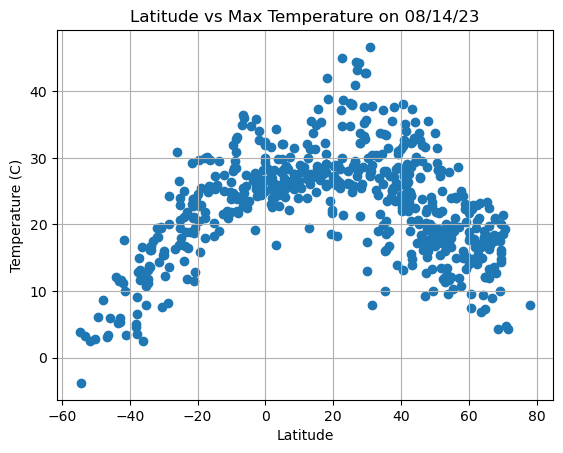

In [11]:
# Build scatter plot for latitude vs. temperature

x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y)
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Max Temperature on " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

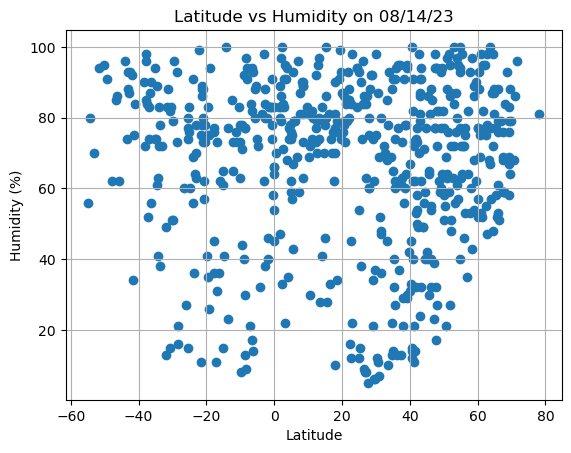

In [12]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y)
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Humidity on " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

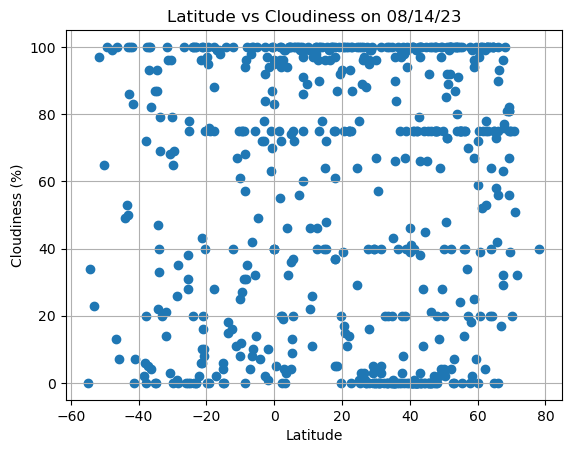

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y)
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Cloudiness on " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

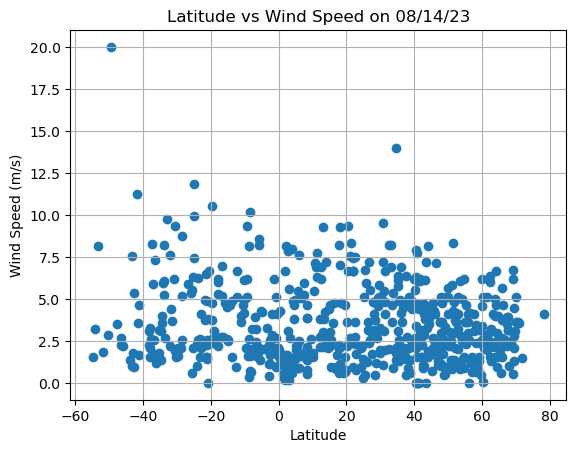

In [14]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y)
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Wind Speed on " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_regression(x,y,title,y_label,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    #create regression values
    regress_values = x * slope + intercept
    #create the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create scatter plot and red line regression
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    #print r-value
    print(f"The r-value is: {rvalue}")
    #add annotated text 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Vrangel',42.7297,133.0839,19.03,98,100,1.07,RU,1692024460
4,Jamestown,42.0970,-79.2353,21.96,77,0,1.54,US,1692024262
5,Iqaluit,63.7506,-68.5145,6.85,100,20,1.54,CA,1692024397
6,Lihue,21.9789,-159.3672,25.77,80,75,6.69,US,1692024463
8,Chīras,35.4167,65.9823,10.04,40,0,2.33,AF,1692024464


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Adamstown,-25.0660,-130.1015,20.72,76,78,9.94,PN,1692024460
2,Waitangi,-43.9535,-176.5597,12.12,96,49,1.34,NZ,1692024461
3,Alofi,-19.0595,-169.9187,22.94,94,75,3.09,NU,1692024462
7,Puerto Natales,-51.7236,-72.4875,2.54,94,97,1.86,CL,1692024463
9,Port-aux-Français,-49.3500,70.2167,6.18,91,100,20.01,TF,1692024464


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5581656005518967


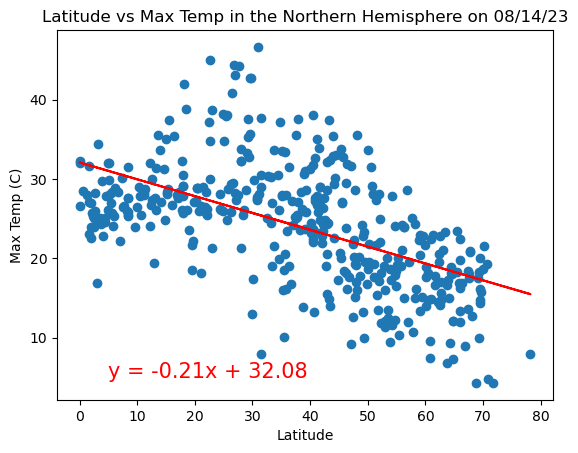

In [18]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]

plot_regression(x,y,"Latitude vs Max Temp in the Northern Hemisphere on \
" + time.strftime("%x"),"Max Temp (C)",(5,5))

The r-value is: 0.851158924554867


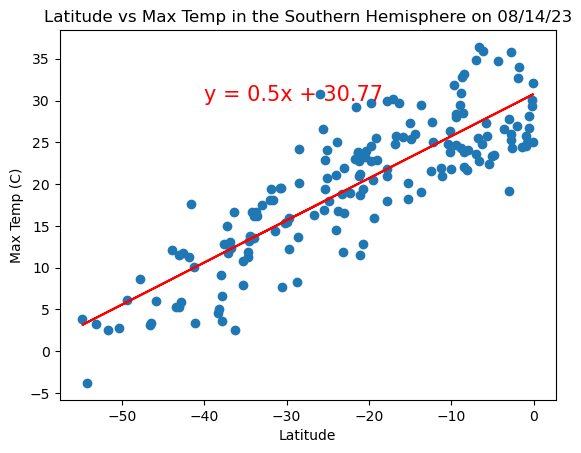

In [19]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]

plot_regression(x,y,"Latitude vs Max Temp in the Southern Hemisphere on \
" + time.strftime("%x"),"Max Temp (C)",(-40,30))

**Discussion about the linear relationship:** When looking at the Northern Hemisphere and as you move from the equator and head north, there is a moderate negative correlation in the relationship between tempearture and your distance from the equator. In other words, while moderately consistent, the further north you go from the equator, the colder it gets.

When looking at the Southern Hemisphere, there is a strong positive correlation as you move from far south towards the equator. In other words, when in the Southern Hemisphere, the temperature gets warmer the closer you get to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004942074575858691


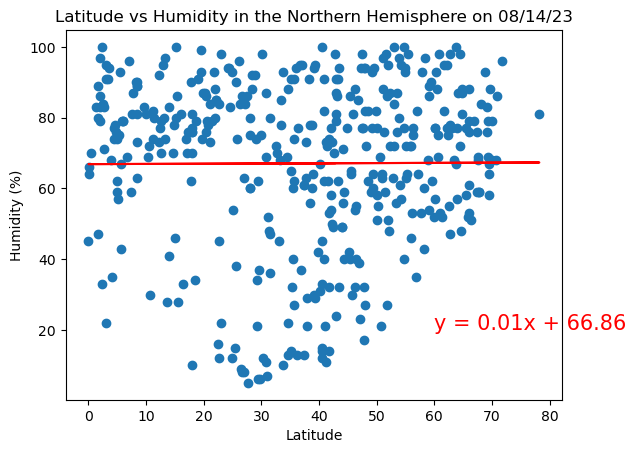

In [20]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]

plot_regression(x,y,"Latitude vs Humidity in the Northern Hemisphere on \
" + time.strftime("%x"),"Humidity (%)",(60,20))

The r-value is: -0.1487001206775062


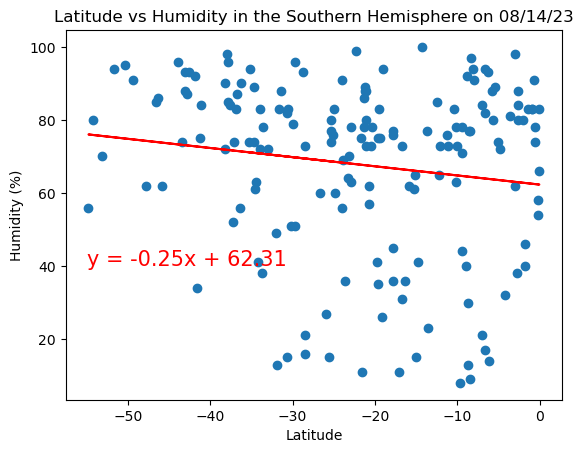

In [21]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]

plot_regression(x,y,"Latitude vs Humidity in the Southern Hemisphere on \
" + time.strftime("%x"),"Humidity (%)",(-55,40))

**Discussion about the linear relationship:** For the Northern Hemisphere, there is an extremely weak positive correlation between the distance from the equator and humidity as you move from the equator northwards. For the Southern Hemisphere, there is a very weak negative correlation between humidity and the distance to the equator if you start from the southern most point and move towards the equator.

Whether you're in the Northern or Southern Hemispheres, there is no correlation between the distance from the equator and the humidity percentage. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03046765161565037


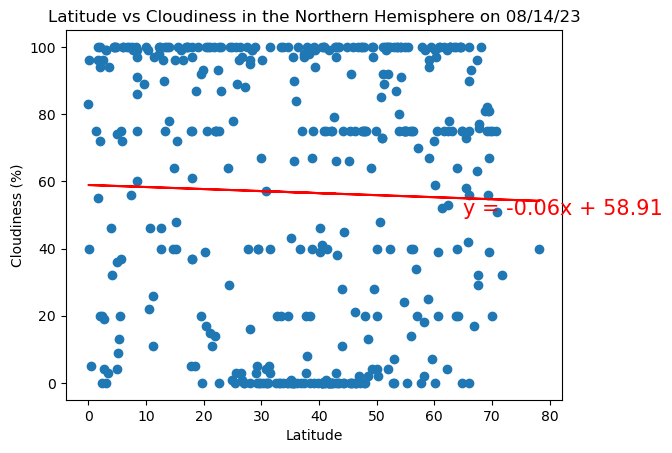

In [22]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]

plot_regression(x,y,"Latitude vs Cloudiness in the Northern Hemisphere on \
" + time.strftime("%x"),"Cloudiness (%)",(65,50))

The r-value is: 0.05984784740009662


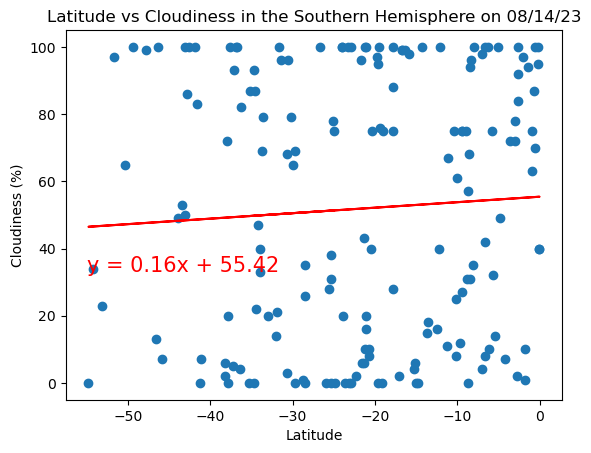

In [23]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]

plot_regression(x,y,"Latitude vs Cloudiness in the Southern Hemisphere on \
" + time.strftime("%x"),"Cloudiness (%)",(-55,33))

**Discussion about the linear relationship:** For the Northern Hemisphere, there is an extremely weak negative correlation between the distance from the equator and cloudiness as you move from the equator northwards. For the Southern Hemisphere, there is a very weak positive correlation between cloudiness and the distance to the equator if you start from the southern most point and move towards the equator.

Just like humidity, whether you're in the Northern or Southern Hemispheres, there is no correlation between the distance from the equator and the cloudiness percentage.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06838379950593396


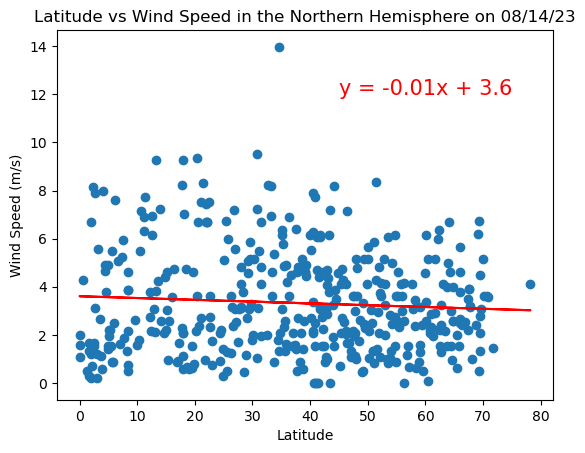

In [24]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]

plot_regression(x,y,"Latitude vs Wind Speed in the Northern Hemisphere on \
" + time.strftime("%x"),"Wind Speed (m/s)",(45,12))

The r-value is: -0.14274547795821124


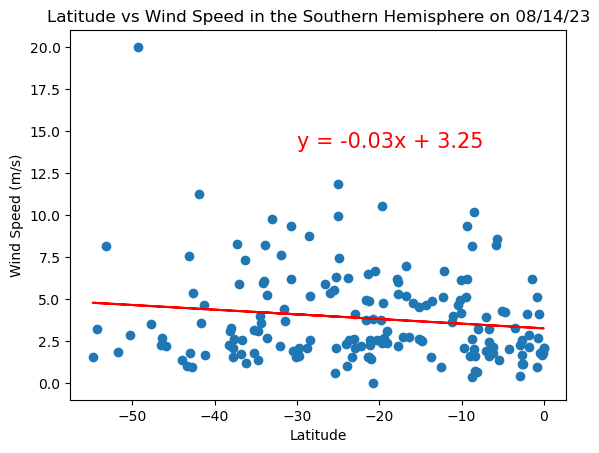

In [25]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]

plot_regression(x,y,"Latitude vs Wind Speed in the Southern Hemisphere on \
" + time.strftime("%x"),"Wind Speed (m/s)",(-30,14))

**Discussion about the linear relationship:** For the Northern Hemisphere, there is an extremely weak negative correlation between the distance from the equator and wind speed as you move from the equator northwards. For the Southern Hemisphere, there is a very weak negative correlation between wind speed and the distance to the equator if you start from the southern most point and move towards the equator.

Just like humidity and cloudiness, whether you're in the Northern or Southern Hemispheres, there is no correlation between the distance from the equator and wind speed.